In [1]:
import tensorflow as tf
import numpy as np

x_data = [[0,1,0,1,0.5,0.6],[0,0,1,1,0.5,0.2]]
y_data = [0, 1, 1, 0,1,0]

L=2
X = tf.placeholder(tf.float32,shape=[2,None])
Y = tf.placeholder(tf.float32,shape=[None])


W1 = tf.Variable(tf.random_uniform([L, 2], 0.0, 1.0))
b1 = tf.Variable(tf.zeros([L,1]))
Layer_1 = tf.sigmoid(tf.matmul(W1, X) + b1)

W2 = tf.Variable(tf.random_uniform([L, 2], -1.0, 0))
b2 = tf.Variable(tf.zeros([L,1]))
Layer_2 = tf.sigmoid(tf.matmul(W2, Layer_1) + b2)

W3 = tf.Variable(tf.random_uniform([1, L], -1.0, 1.0))
b3 = tf.Variable(tf.zeros([1]))
Out = tf.sigmoid(tf.matmul(W3,Layer_2) + b3)

loss = tf.reduce_sum(tf.square(Out-Y))
epslion =0.1
optimizer = tf.train.GradientDescentOptimizer(epslion)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        _, loss_value, W_1, b_1, W_2, b_2, W_3, b_3 = sess.run([train, loss, W1, b1, W2, b2, W3, b3],
                                                                   feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:   
            print(loss_value)
    
    correct_prediction = tf.equal(tf.floor(Out+0.5), Y) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print(sess.run(accuracy,feed_dict={X: x_data, Y: y_data}))


1.5327841
1.4904736
1.3145692
1.1617167
0.5192566
0.03818588
0.01407304
0.008042432
0.0054836054
0.004105771
0.0032562932
0.0026848393
0.0022762872
0.0019708246
0.001734437
0.0015464519
0.0013936706
0.0012671998
0.0011608802
0.0010703317
1.0


In [2]:
import tensorflow as tf
import numpy as np

x_data = [[0,1,0,1,0.5,0.6],[0,0,1,1,0.5,0.2]]
y_data = [0, 1, 1, 0,1,0]

L=10
X = tf.placeholder(tf.float32,shape=[2,None])
Y = tf.placeholder(tf.float32,shape=[None])


W12 = tf.Variable(tf.random_uniform([L, 2], 0.0, 1.0))
b12 = tf.Variable(tf.zeros([L,1]))
Layer_1 = tf.sigmoid(tf.matmul(W12, X) + b12)


W3 = tf.Variable(tf.random_uniform([1, L], -1.0, 0.0))
b3 = tf.Variable(tf.zeros([1]))
Out = tf.sigmoid(tf.matmul(W3,Layer_1) + b3)

loss = tf.reduce_sum(tf.square(Out-Y))
epslion =0.1
optimizer = tf.train.GradientDescentOptimizer(epslion)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        _, loss_value, wgt_12, b_12, wgt_3, b_3 = sess.run([train, loss, W12, b12, W3, b3],
                                                                   feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:   
            print(loss_value)
    
    correct_prediction = tf.equal(tf.floor(Out+0.5), Y) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print(sess.run(accuracy,feed_dict={X: x_data, Y: y_data}))


2.691425
1.0208642
0.42878512
0.14240517
0.06466534
0.03777633
0.025353314
0.018486287
0.014233055
0.011387919
0.009376867
0.00789539
0.0067681465
0.0058878837
0.005185539
0.0046149483
0.004144145
0.0037504782
0.0034173785
0.003132666
1.0


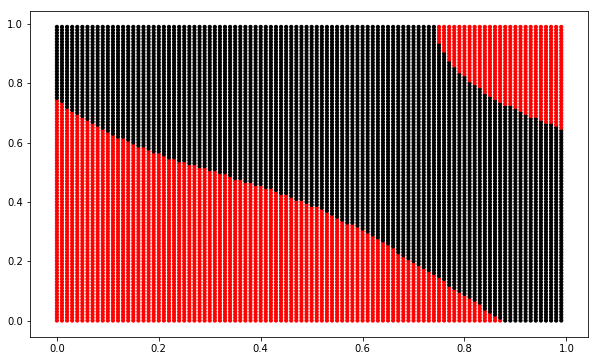

In [3]:
points = np.zeros((2,10000))
colors=[]
for i in range(100):
    for j in range(100):
        points[0][i*100+j] = i*0.01 
        points[1][i*100+j] = j*0.01
Hm= np.dot(wgt_12,points)+b_12
H_1=1/(1+np.exp(-Hm)) # 히든 레이어 적용
OutLast = 1/(1+np.exp(-(np.dot(wgt_3,H_1)+b_3))) #출력 레이어 적용
FGSN=np.array(OutLast).reshape((10000))
for i in range(10000):
        if FGSN[i] >= 0.5 :
             colors.append('black')
        else :
            colors.append('red')
xs = points[0:10000][0]
ys = points[0:10000][1]
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, c=colors, s=10)
plt.show()

[[0.  1.  0.  1.  0.5 0.6]
 [0.  0.  1.  1.  0.5 0.2]]


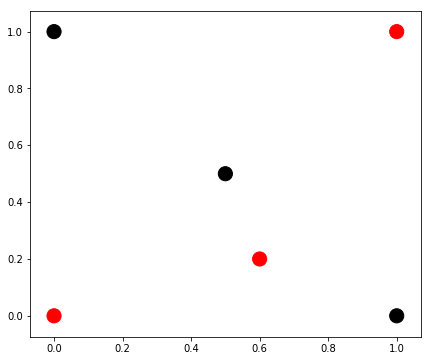

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x_data = [[0,1,0,1,0.5,0.6],[0,0,1,1,0.5,0.2]]
xx=np.array(x_data)
print(xx)
xs = xx[0:5][0]
ys = xx[0:5][1]
colors=['red','black', 'black','red','black','red']

plt.figure(figsize=(7, 6))
plt.scatter(xs, ys, c=colors, s=200)
plt.show()


In [3]:
import tensorflow as tf
import numpy as np

x_data = [[0,1,0,1,0.5,0.6],[0,0,1,1,0.5,0.2]]
y_data = [0, 1, 1, 0,1,0]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W12 = tf.Variable(tf.random_uniform([2, 2], 0.0, 1.0))
W3 = tf.Variable(tf.random_uniform([1, 2], -1.0, 0.0))
b12 = tf.Variable(tf.zeros([2,1]))
b3 = tf.Variable(tf.zeros([1]))

Hidden = tf.sigmoid(tf.matmul(W12, X) + b12)
Out = tf.sigmoid(tf.matmul(W3, Hidden) + b3)

loss = tf.reduce_sum(tf.square(Out-Y))
epslion = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(epslion)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        _, loss_value, wgt_12, b_12, wgt_3, b_3 = sess.run([train, loss, W12, b12, W3, b3],
                                                                   feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:   
            print(loss_value)
    
    correct_prediction = tf.equal(tf.floor(Out+0.5), Y) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print(sess.run(accuracy,feed_dict={X: x_data, Y: y_data}))


1.59191
1.4921678
1.1323038
0.9699155
0.8914046
0.7934759
0.70637363
0.6504204
0.6167316
0.5950952
0.58022577
0.56942785
0.56124216
0.5548232
0.5496528
0.54539675
0.54183024
0.5387958
0.5361819
0.5339057
0.6666667


In [45]:
import tensorflow as tf

a=tf.placeholder("float")
b=tf.placeholder("float")

y=tf.multiply(a,b)
with tf.Session() as sess:
    out= sess.run(y, feed_dict={a: 112, b: 3})  

print(out)


336.0


In [44]:
import tensorflow as tf

x=tf.Variable(3) #변수 정의
y=tf.Variable(4) #변수 정의
f=x*x + y * y + 2 #모델 정의
init = tf.global_variables_initializer() #변수 초기화
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(f))
    print(f.eval(session=sess))

27
27


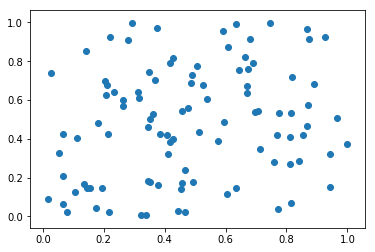

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_data = np.random.rand(100)
y_data = np.random.rand(100)
plt.scatter(x_data, y_data)
plt.show()


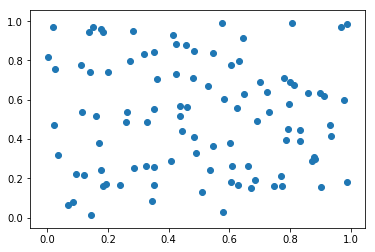

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
num_points = 100
vector_set = []
for k in range(num_points):
    x1=np.random.uniform(0.0,1.0) # 0과1 사이에서 임의의 실수값 선택
    y1=np.random.uniform(0.0,1.0) # 0과1 사이에서 임의의 실수값 선택
    vector_set.append([x1,y1]) #vector_set에 리스트로 추가
FGSN=np.array(vector_set) #vector_set을 array FGSN로 변경
x_data=[v[0] for v in FGSN] #array FGSN의 각행을 불러와서 첫번째 칼럼만 모아 list로 추출
y_data=[v[1] for v in FGSN] #array FGSN의 각행을 불러와서 두번째 칼럼만 모아 list로 추출
plt.scatter(x_data,y_data) 
plt.show()


In [88]:
FG=[1,2,3,4,5]
FG
FG[0]
FG[-1]
FG=[3,4,5,['a', 'b'],6]
FG[-1] #FG의 가장 끝 요소
print(FG[-2][0]) #a
print(FG[0:2])
print(FG[:-1], FG[:])
#FG[a:b] =a위치에서 b개를 추출, FG[a:-1]=a위치에서 끝점 바로전까지


a
[3, 4]
[3, 4, 5, ['a', 'b']] [3, 4, 5, ['a', 'b'], 6]


In [16]:
FG=[]
for i in range(10) : FG.append(i), print(FG)


[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
import numpy as np

for i in range(5):
    print(np.sort(np.random.choice(45,6, replace = False)+1))


[10 17 25 26 32 37]
[ 2  8 12 15 41 42]
[11 15 17 26 30 32]
[ 4  6 26 27 28 35]
[15 22 27 29 35 36]


In [14]:
a, b = 0, 1
while a < 10:
        print(a, end=' ')
        a, b = b, a + b


0 1 1 2 3 5 8 

In [1]:
for i in range(10):
        print(i)

0
1
2
3
4
5
6
7
8
9


In [6]:
a = 0
b = 1
while b < 1000:
         a = b 
         b = a  +  b
         print(b)
print("out of while", b)


2
4
8
16
32
64
128
256
512
1024
out of while 1024


In [12]:
FG=range(10) #항상 0부터 시작함
for number in FG:
    if number in (1,3,5,7,9): 
        print('the number is odd', number)
    else:
        print('the number is even', number)



the number is even 0
the number is odd 1
the number is even 2
the number is odd 3
the number is even 4
the number is odd 5
the number is even 6
the number is odd 7
the number is even 8
the number is odd 9
